# IMPORTS

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Building a Credit Scoring Model with Logistic Regression

In [2]:
# Load the dataset
file_path = '/kaggle/input/credit-scoring/cs-training.csv'
data = pd.read_csv(file_path)

# Specify the correct target column name
target_column = 'SeriousDlqin2yrs'

# Separate features and target variable
X = data.drop(target_column, axis=1)
y = data[target_column]

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_imputed)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Make predictions & Evaluate accuracy

In [3]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9348666666666666


# VISUALIZATION

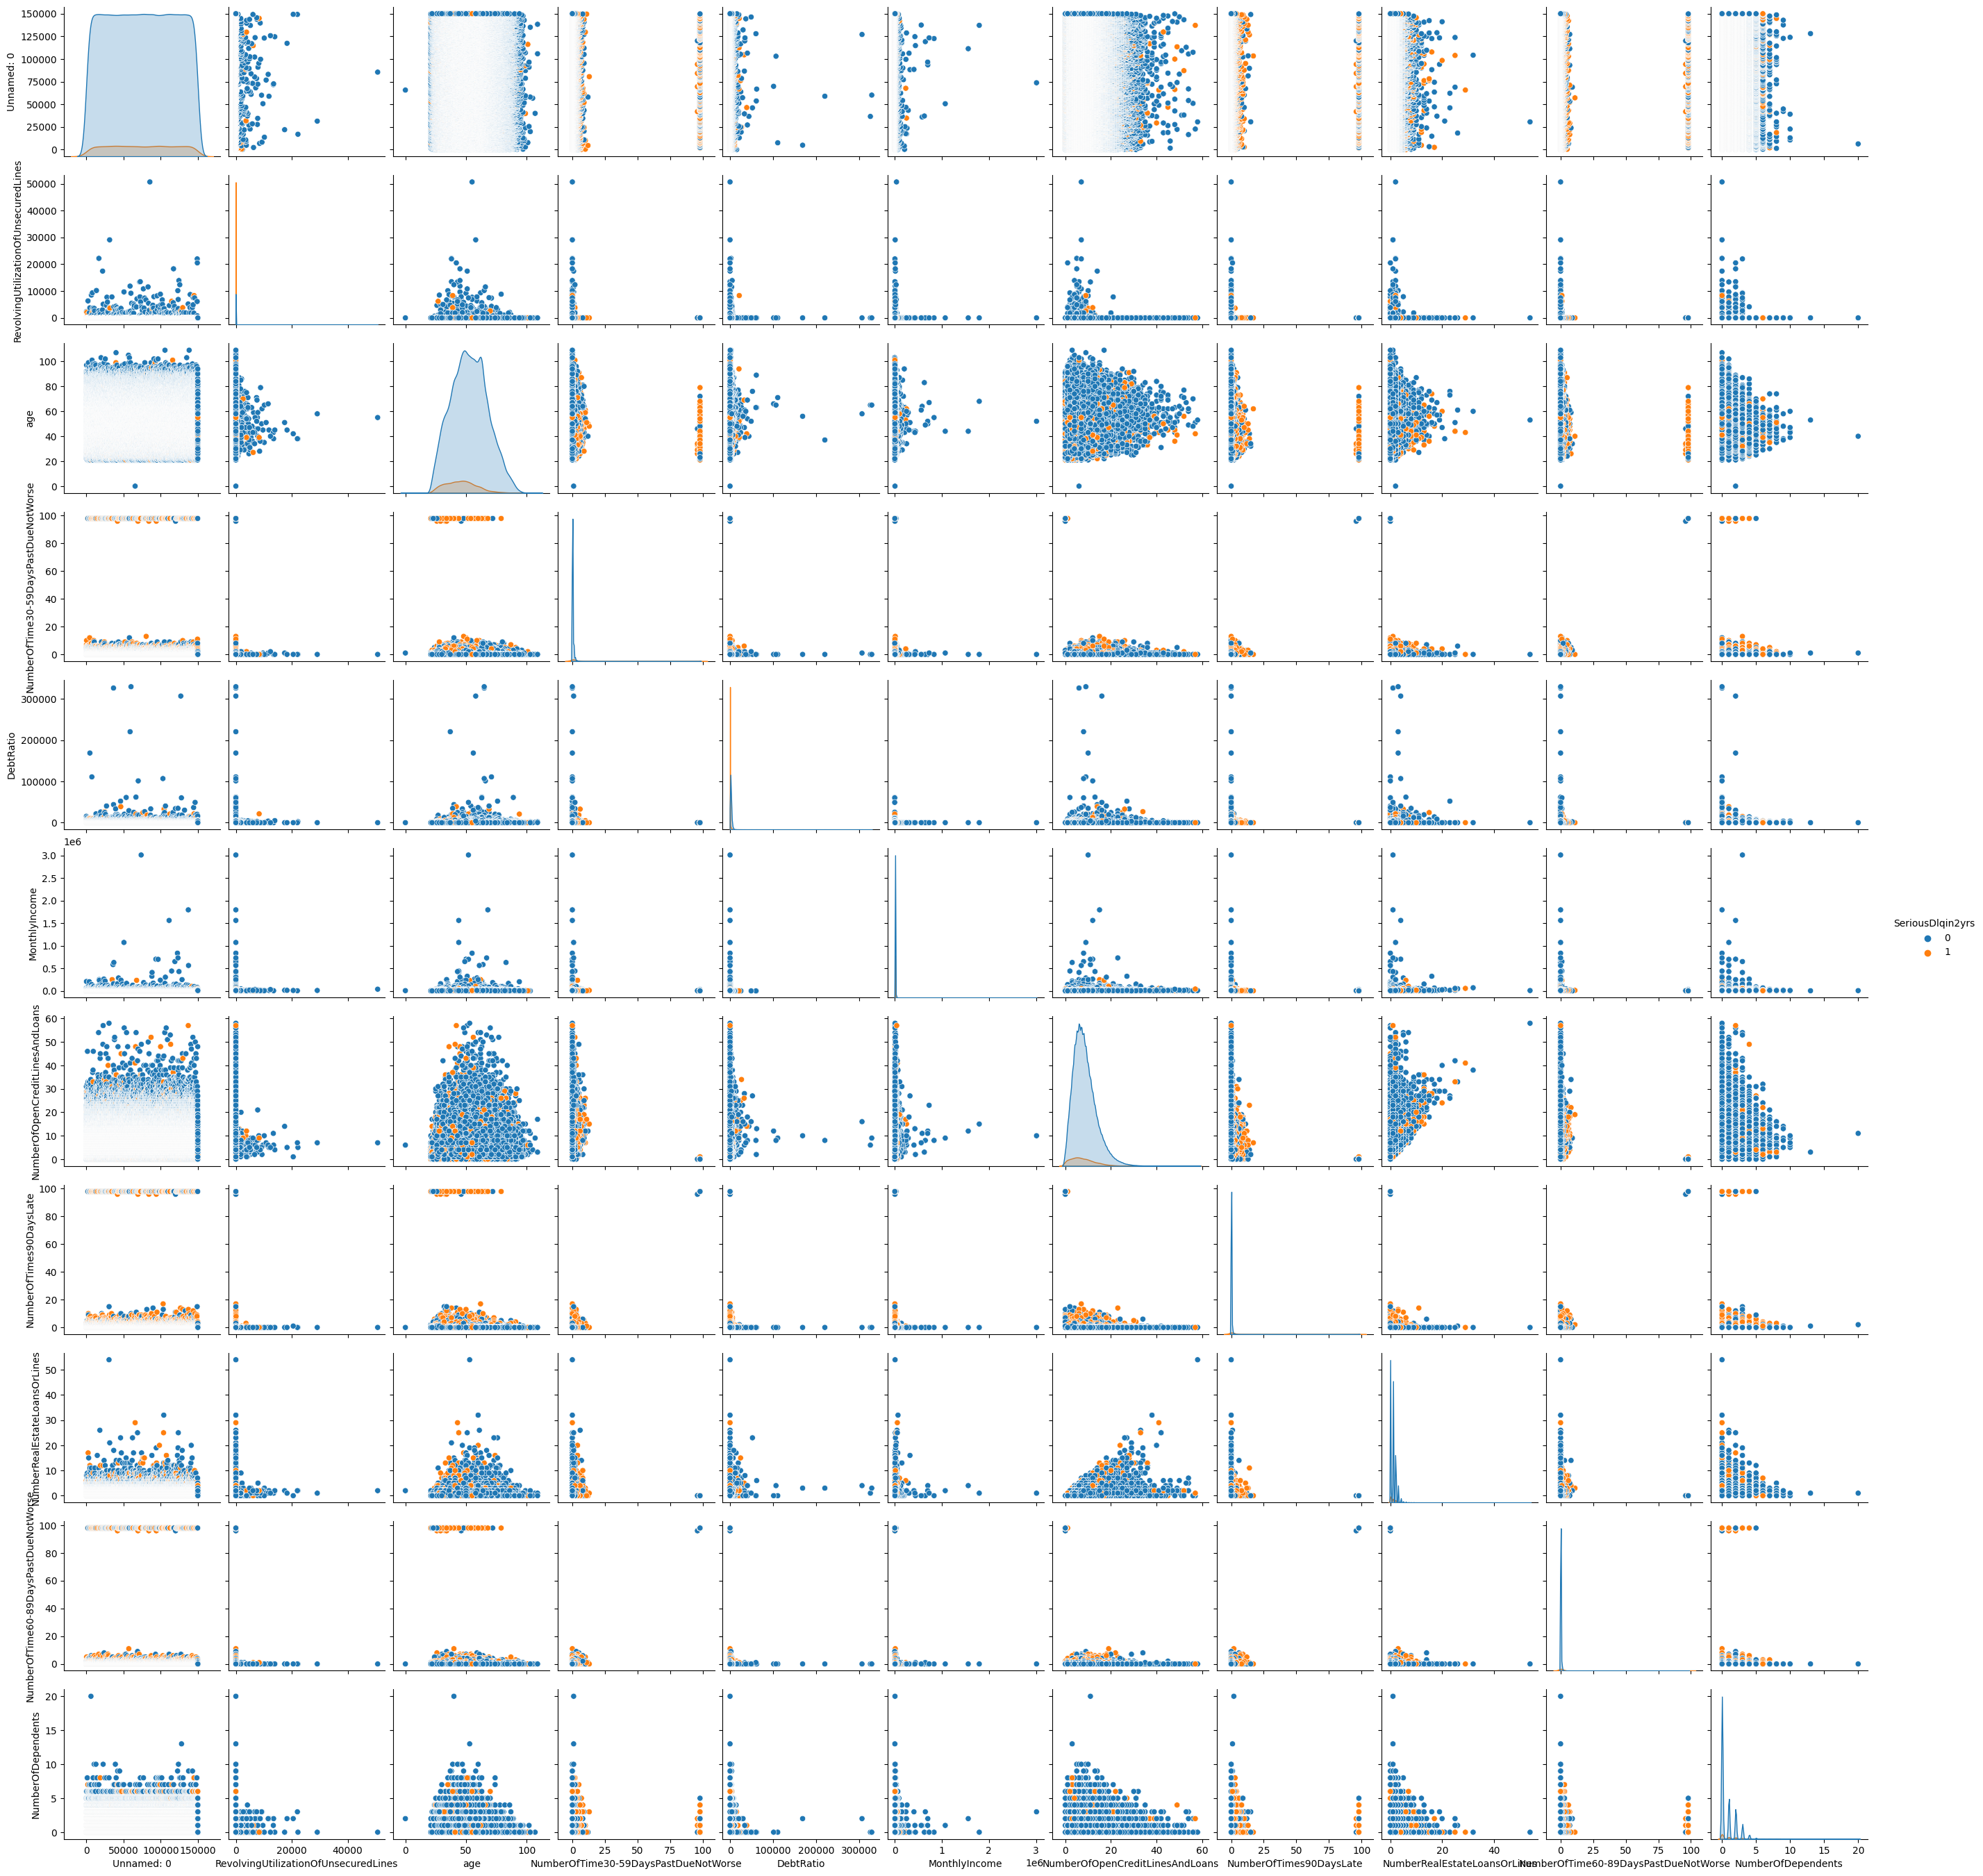

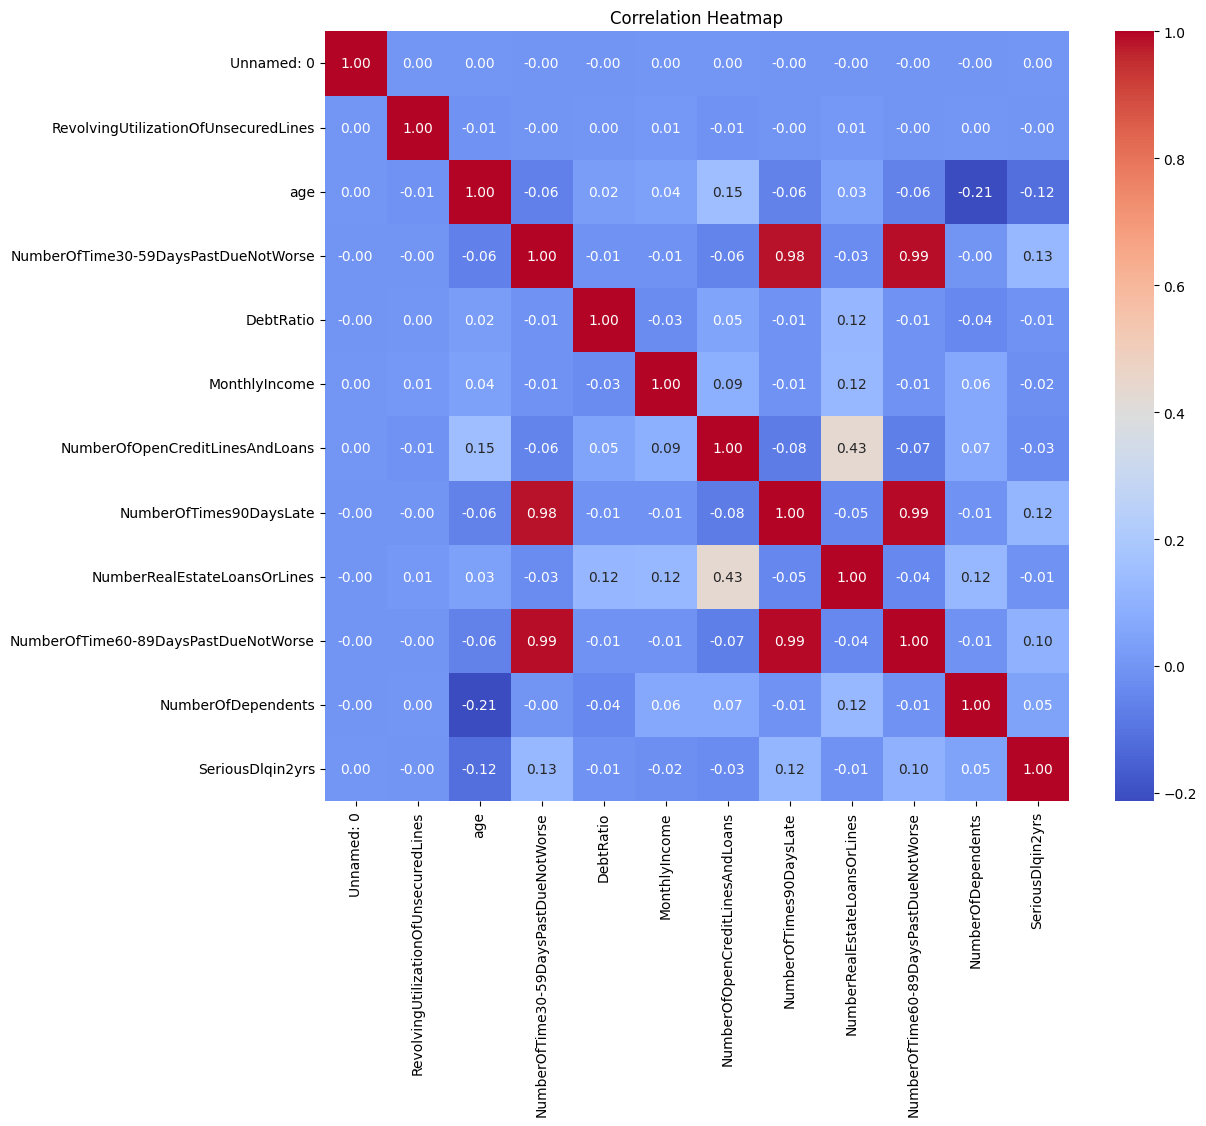

In [4]:
# Join features and target variable for visualization
data_for_visualization = X.copy()
data_for_visualization[target_column] = data[target_column]

# Pair plot
sns.pairplot(data_for_visualization, hue=target_column)
plt.show()

# Correlation heatmap
correlation_matrix = data_for_visualization.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()